In [18]:
from utils import open_csv_file, append_rows_dataframes, create_csv_file
from data import DataFrame
from correlation_matrix import Correlation
import pandas as pd

In [19]:
training_data = open_csv_file('train.csv')
testing_data = open_csv_file('test.csv')

df = append_rows_dataframes(testing_data, training_data)

In [20]:
# id - unique value
# gender - male/female
# ever_married - yes/no/null
# age - int
# graduate yes/no/null
# profession - healthcare/engineer/lawyer/etc
# work experience - 0 to 14
# spending_score low/average/high
# family_size 1 to 9
# var_1 - cat_6/cat_4

data_frame_instance = DataFrame(df)
data_frame_instance.get_df().shape
data_frame_instance.remove_columns(['ID'])
data_frame_instance.check_missing_data()


Gender               0
Ever_Married       100
Age                  0
Graduated           48
Profession          76
Work_Experience    538
Spending_Score       0
Family_Size        226
Var_1               64
dtype: int64

In [21]:
# need to handle missing values before encoding because it will handle the missing value for me

# ever married - find mode
# graduated - find mode
# Profession - find mode
# work experience - can you predicted this value ?
# family size - can you predicted this value ?
# var 1

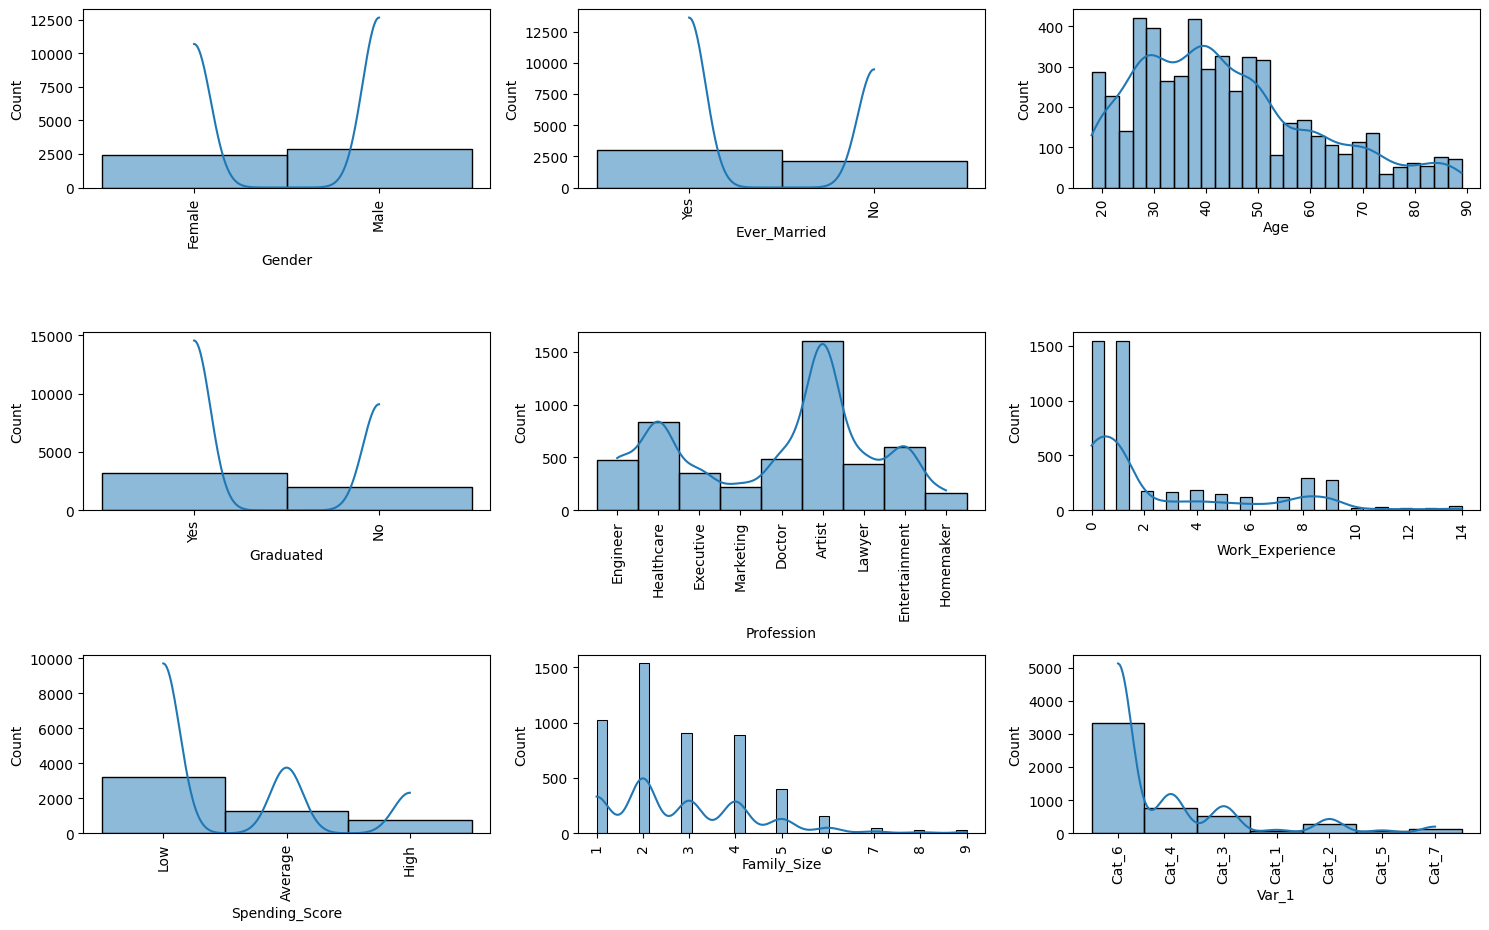

In [22]:
columns = data_frame_instance.get_df().columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data_frame_instance.get_df()[col], kde=True)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [23]:
# transformation

# It initializes an instance of SimpleImputer with the strategy set to
# 'most_frequent', which means it will replace all missing (NaN) values with the most frequent value in each column.
x = data_frame_instance.get_df()[['Ever_Married', 'Profession', 'Work_Experience', 'Var_1', 'Graduated']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
transformed_data = imputer.fit_transform(x)

transformed_df = pd.DataFrame(transformed_data, columns=['Ever_Married', 'Profession', 'Work_Experience', 'Var_1', 'Graduated'])
data_frame_instance.get_df()[['Ever_Married', 'Profession', 'Work_Experience', 'Var_1', 'Graduated']] = transformed_df[['Ever_Married', 'Profession', 'Work_Experience', 'Var_1', 'Graduated']]
data_frame_instance.label_encoding('Graduated')

In [24]:
data_frame_instance.get_df()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,1,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,1,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,0,Artist,0.0,Low,1.0,Cat_6
3,Male,Yes,59,0,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,0,Marketing,1.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,0,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,1,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,1,Entertainment,1.0,Low,2.0,Cat_6
2625,Male,Yes,47,1,Executive,1.0,High,5.0,Cat_4


In [25]:
data_frame_instance.get_df()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,1,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,1,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,0,Artist,0.0,Low,1.0,Cat_6
3,Male,Yes,59,0,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,0,Marketing,1.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,0,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,1,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,1,Entertainment,1.0,Low,2.0,Cat_6
2625,Male,Yes,47,1,Executive,1.0,High,5.0,Cat_4


<Axes: >

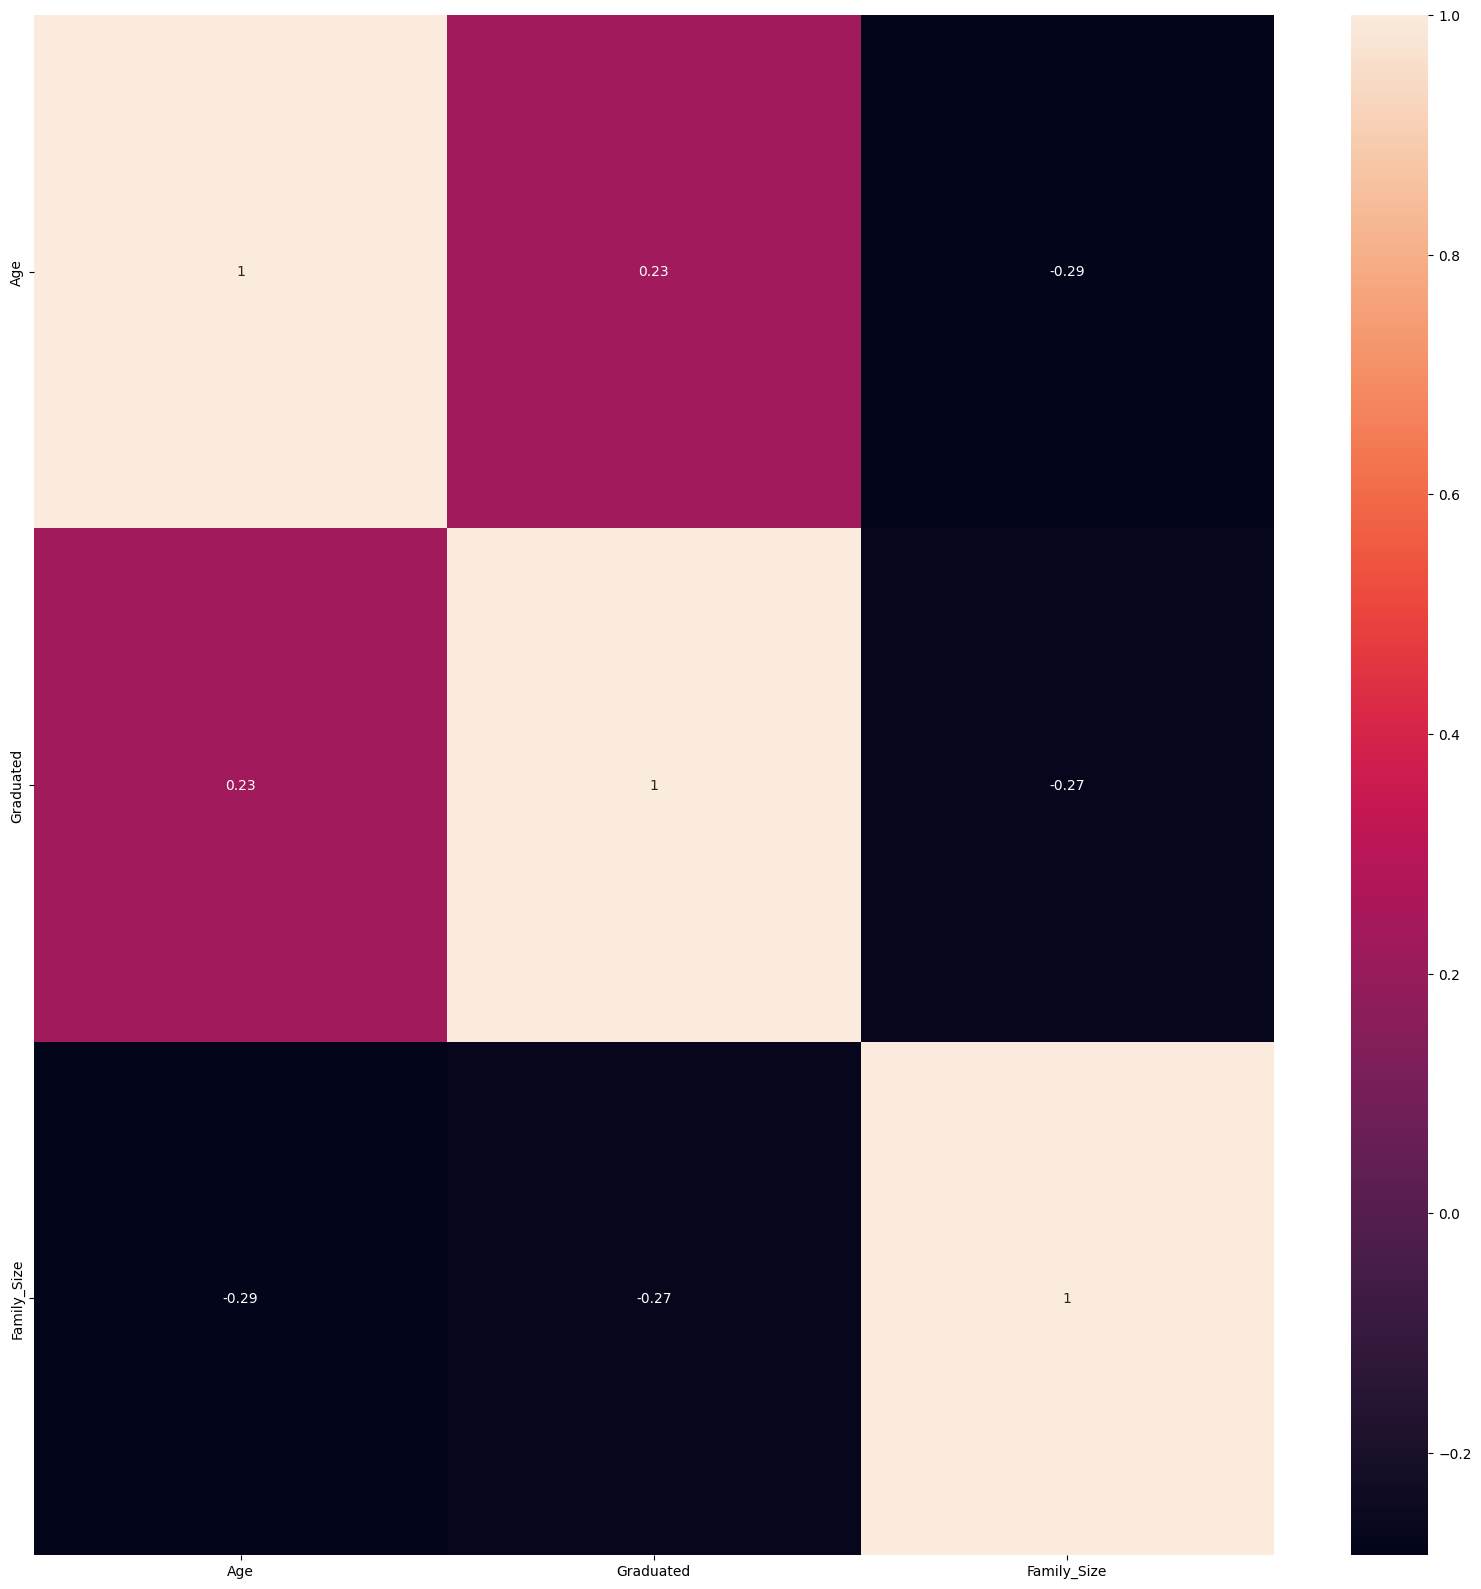

In [26]:
correlation_instance = Correlation(data_frame_instance.get_df())
correlation_instance.create_correlation_matrix()

# below shows there is high correlation between 'Family_Size', 'Age', 'Graduated' so would make senses to predict the value

In [27]:
# In the IterativeImputer scikit-learn class,
# there isn't explicitly a "target" variable. Instead, for each feature with missing values,
# IterativeImputer treats that feature as the "target" and the remaining features as predictors (inputs), one by one.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
y = data_frame_instance.get_df()[['Family_Size', 'Age']]

transformed_data = impute_it.fit_transform(y)
transformed_df = pd.DataFrame(transformed_data, columns=['Family_Size', 'Age'])
data_frame_instance.get_df()[['Family_Size', 'Age']] = transformed_df[['Family_Size', 'Age']]

In [28]:
data_frame_instance.get_df()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36.0,1,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37.0,1,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69.0,0,Artist,0.0,Low,1.0,Cat_6
3,Male,Yes,59.0,0,Executive,11.0,High,2.0,Cat_6
4,Female,No,19.0,0,Marketing,1.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29.0,0,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35.0,1,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53.0,1,Entertainment,1.0,Low,2.0,Cat_6
2625,Male,Yes,47.0,1,Executive,1.0,High,5.0,Cat_4


In [29]:
# gender - hot encoding
# ever_married - hot encoding
# graduated - hot endcoding
# spending score - hot endcoding

# profession - label encoding
# var_1 - label encoding

# because profession and var_1 could result in a lot of columns so will affect compute time

data_frame_instance.label_encoding('Profession')
data_frame_instance.label_encoding('Var_1')

data_frame_instance.hot_encoding('Gender')
data_frame_instance.hot_encoding('Ever_Married')
data_frame_instance.hot_encoding('Spending_Score')

In [30]:
data_frame_instance.get_df()

,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,36.0,1,2,0.0,1.0,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,37.0,1,5,8.0,4.0,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,69.0,0,0,0.0,1.0,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,59.0,0,4,11.0,2.0,5,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,19.0,0,8,1.0,4.0,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,29.0,0,5,9.0,4.0,5,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5250,35.0,1,1,1.0,1.0,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5251,53.0,1,3,1.0,2.0,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5252,47.0,1,4,1.0,5.0,3,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [31]:
data_frame_instance.bucket_quantile('Age')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
data_frame_instance.get_df()[columns_to_normalize] = scaler.fit_transform(data_frame_instance.get_df()[columns_to_normalize])

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_84223/3902048750.py:7: UserWarning: 
The palette list has fewer values (5) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data= data_frame_instance.get_df(), palette=colors)


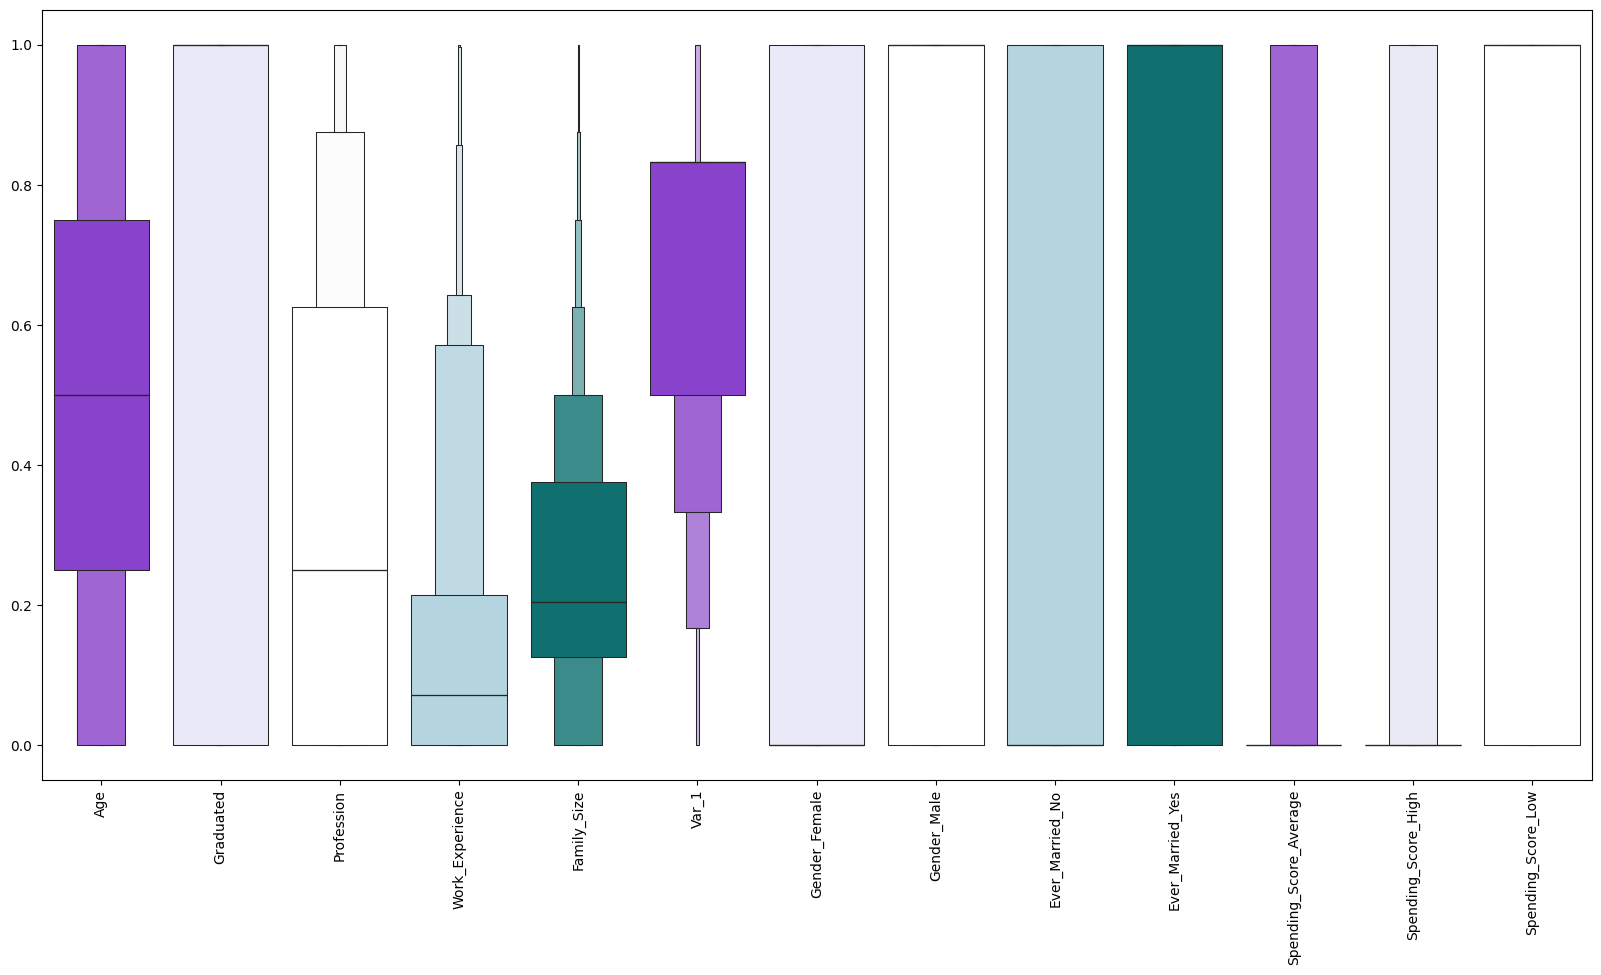

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns


colors = ["#8a2be2", "#e6e6fa", "#ffffff", "#add8e6", "#008080"]
plt.figure(figsize=(20,10))
sns.boxenplot(data= data_frame_instance.get_df(), palette=colors)
plt.xticks(rotation=90)
plt.show()

In [33]:
create_csv_file(data_frame_instance.get_df(), 'data.csv')

<Axes: >

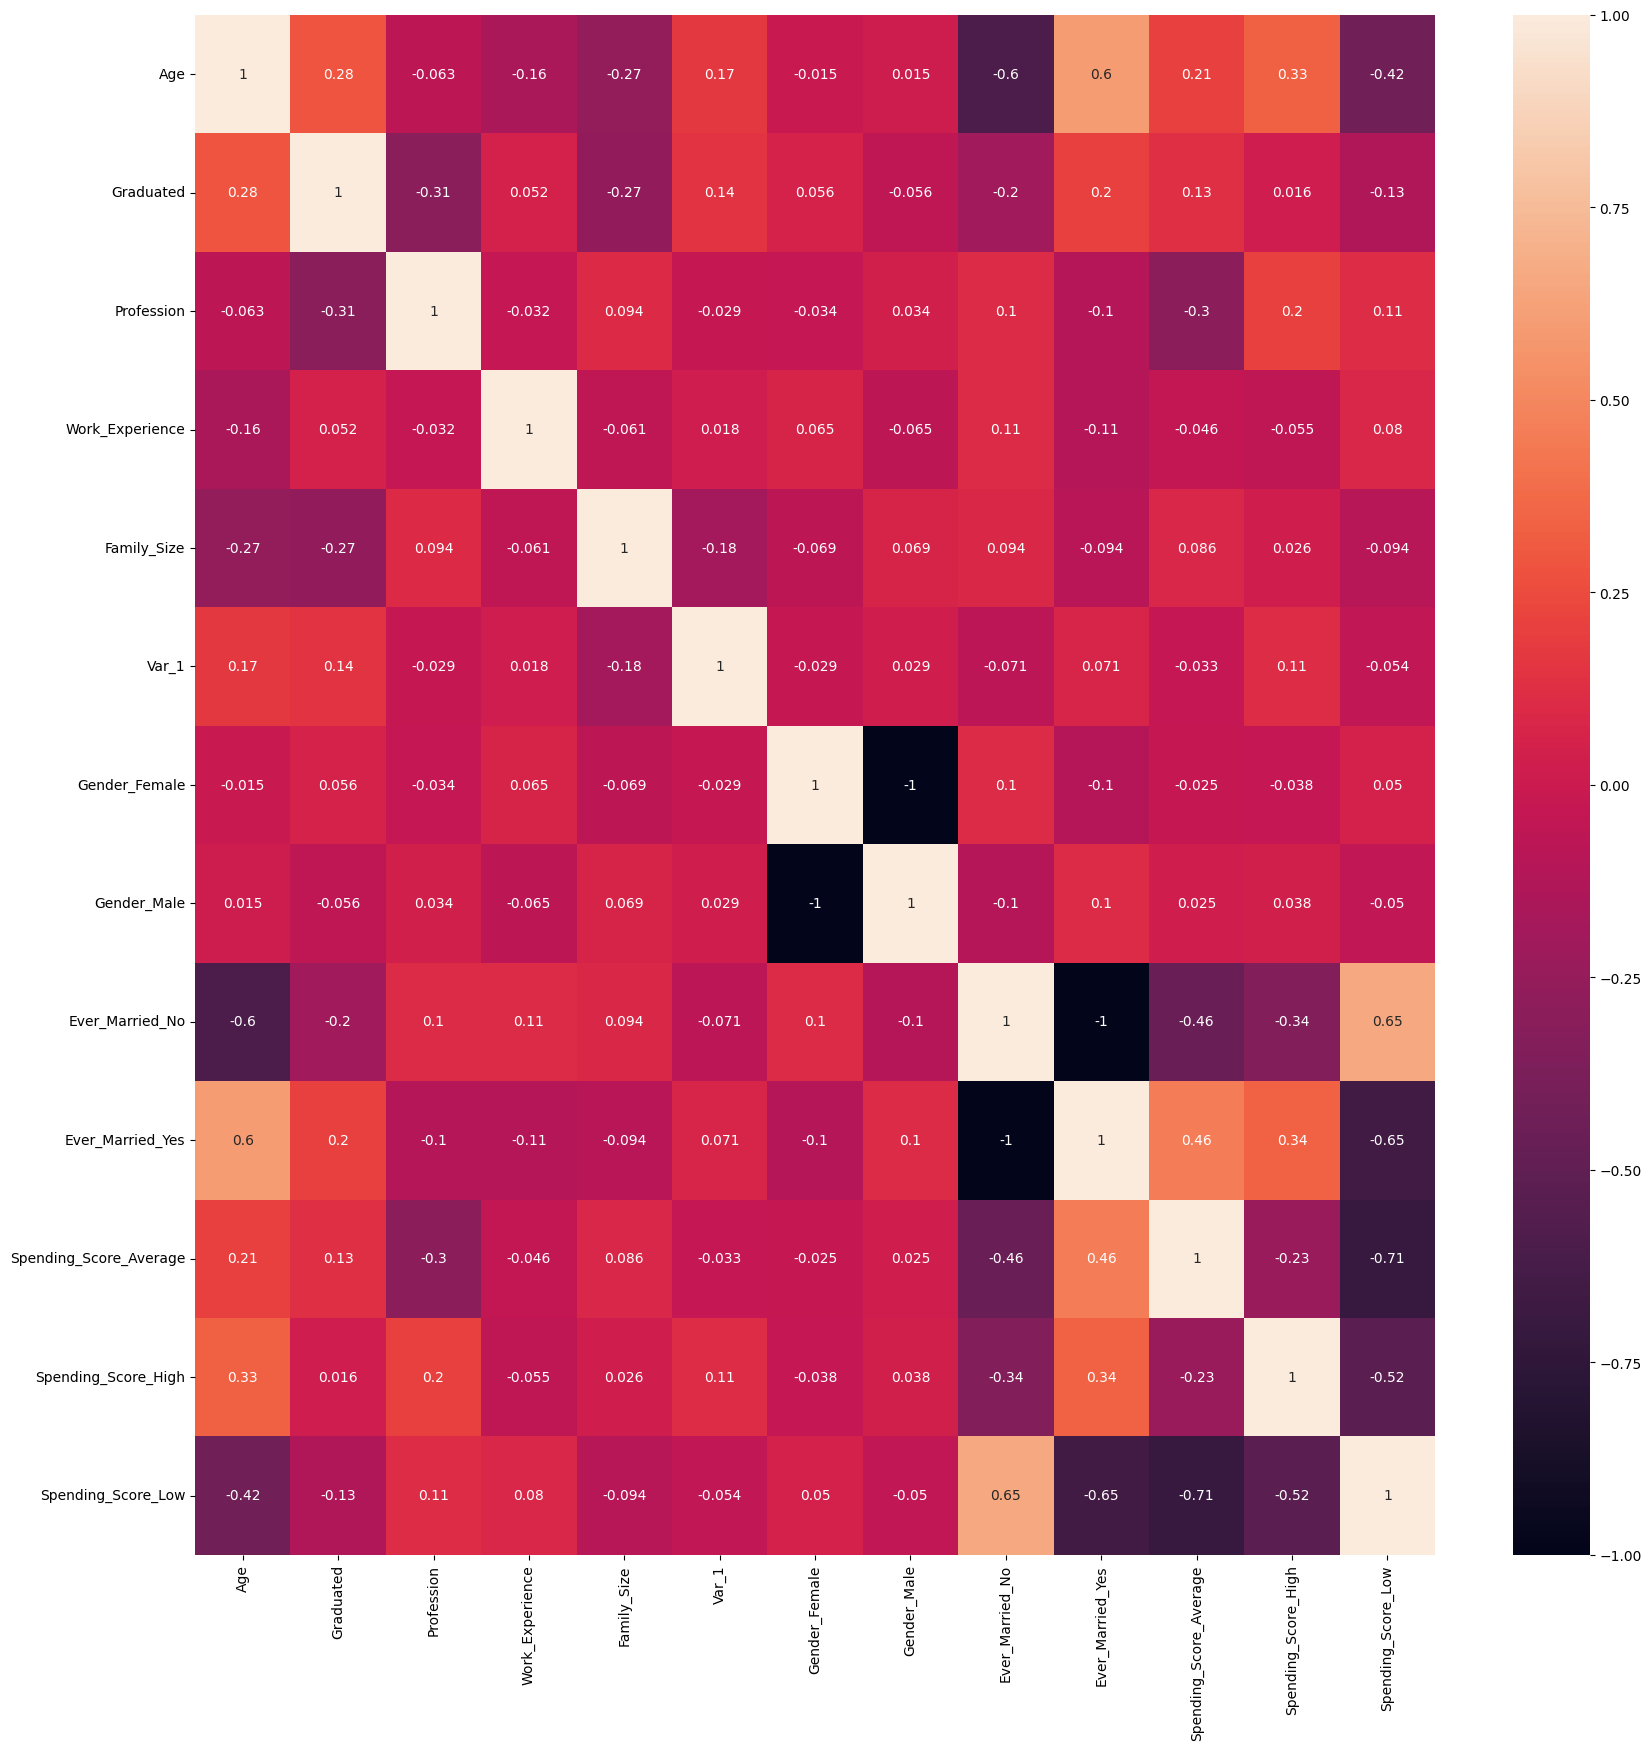

In [34]:
correlation_instance = Correlation(data_frame_instance.get_df())
correlation_instance.create_correlation_matrix()